In [11]:
!pip install sklearn

     |████████████████████████████████| 7.8 MB 342 kB/s eta 0:00:01
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=6f8a699635366ba7cb55a7bbb1b0ea4399f6e5adada9da03714ee2d4abb15f4f
  Stored in directory: /Users/dhchoi/Library/Caches/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
points = pd.read_csv('data.csv')

In [3]:
points

,hours,score
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


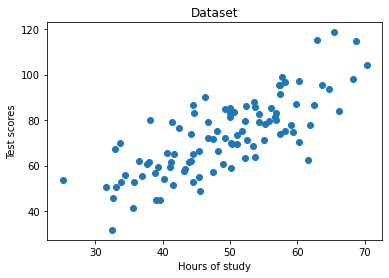

In [3]:
x = np.array(points['hours'])
y = np.array(points['score'])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

### practice 1. 단순 선형 회귀 분석
 - Plot 그리기

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

model.fit(x[:, np.newaxis], y) # 한 차원 추가 unsqueeze랑 비슷

LinearRegression()

In [14]:
x.reshape(len(x), -1) == x[:, np.newaxis]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [15]:
x[:, np.newaxis].shape

(100, 1)

In [16]:
y.shape

(100,)

In [8]:
xfit = np.linspace(np.min(x), np.max(x), 1000)
yfit = model.predict(xfit[:, np.newaxis])

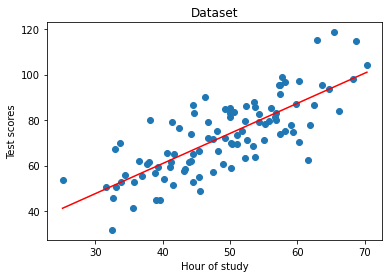

In [9]:
plt.scatter(x, y)
plt.xlabel('Hour of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.plot(xfit, yfit, color = 'r')

 - Slope와 Y-intercept 구하기

In [10]:
print(f'Model slope: {model.coef_[0]}')
print(f'Model intercept: {model.intercept_}')

Model slope: 1.3224310227553597
Model intercept: 7.991020982270399


 - Model의 설명력 구하기

In [30]:
# your code here.

 - 모델 요약하기 & 가설검증하기

In [18]:
!pip install statsmodels

In [21]:
import statsmodels.api as sm
model = sm.OLS.from_formula('score ~ hours', data= points)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     146.2
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           3.86e-21
Time:                        13:15:03   Log-Likelihood:                -377.03
No. Observations:                 100   AIC:                             758.1
Df Residuals:                      98   BIC:                             763.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9910      5.459      1.464      0.146      -2.842      18.824
hours          1.3224      0.109     12.090      0.000       1.105       1.539
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.808
Skew:                           0.148   Prob(JB):                        0.668
Kurtosis:                       2.674   Cond. No.                         257.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### practice 2. 다중 선형 회귀 분석 

In [4]:
gpa = pd.read_csv('data2.csv')

 - Plot 그리기

In [5]:
gpa

,CGPA,HGPA,SAT,QLR
0,2.04,2.01,1070,5
1,2.56,3.40,1254,6
2,3.75,3.68,1466,6
3,1.10,1.54,706,4
4,3.00,3.32,1160,5
...,...,...,...,...
95,1.80,1.64,772,4
96,2.64,1.87,1304,6
97,2.08,2.53,1212,4
98,0.70,1.78,818,6


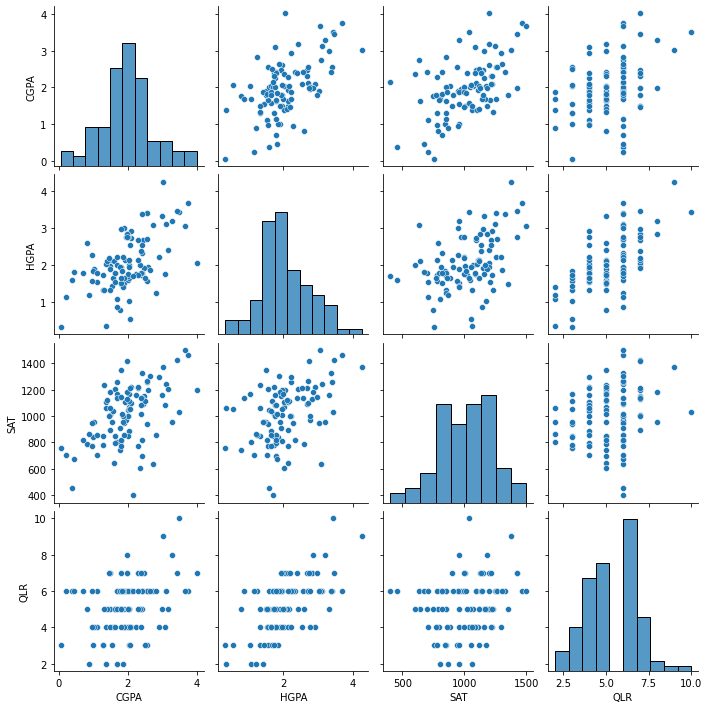

In [24]:
import seaborn as sns
sns.pairplot(gpa)

 - 가설 검정하기

In [26]:
model2 = sm.OLS.from_formula('CGPA ~ HGPA +SAT+QLR', data = gpa)
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CGPA   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     21.31
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           1.16e-10
Time:                        13:47:34   Log-Likelihood:                -87.001
No. Observations:                 100   AIC:                             182.0
Df Residuals:                      96   BIC:                             192.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1533      0.323     -0.475      0.636      -0.794       0.488
HGPA           0.3764      0.114      3.294      0.001       0.150       0.603
SAT            0.0012      0.000      4.046      0.000       0.001       0.002
QLR            0.0227      0.051      0.445      0.657      -0.079       0.124
==============================================================================
Omnibus:                        1.679   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.432   Jarque-Bera (JB):                1.658
Skew:                           0.303   Prob(JB):                        0.437
Kurtosis:                       2.823   Cond. No.                     5.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### practice 3. ANOVA

In [6]:
sprays = pd.read_csv("data3.csv")

In [7]:
sprays

,count,spray
0,10,A
1,7,A
2,20,A
3,14,A
4,14,A
...,...,...
67,10,F
68,26,F
69,26,F
70,24,F


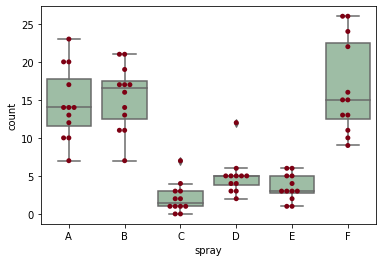

In [29]:
ax = sns.boxplot(x='spray', y='count', data=sprays, color='#99c2a2')
ax = sns.swarmplot(x="spray", y="count", data=sprays, color='#7d0013')
plt.show()

 - One-Way ANOVA 실습

In [31]:
from statsmodels.formula.api import ols
model = ols('count ~ C(spray)', data = sprays).fit()
anova_table = sm.stats.anova_lm(model, tpy=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(spray),5.0,2668.833333,533.766667,34.702282,3.182584e-17
Residual,66.0,1015.166667,15.381313,NaN,NaN


In [96]:
from statsmodels.formula.api import ols
model = ols('count ~ C(spray)', data = sprays).fit()
anova_table = sm.stats.anova_lm(model, tpy=2)
anova_table

,sum_sq,df,F,PR(>F)
C(spray),2668.833333,5.0,34.702282,3.182584e-17
Residual,1015.166667,66.0,NaN,NaN


 - Post Hoc Test 실습

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(sprays['count'], sprays['spray'], alpha = 0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   0.8333    0.9  -3.8659  5.5326  False
     A      C -12.4167  0.001 -17.1159 -7.7174   True
     A      D  -9.5833  0.001 -14.2826 -4.8841   True
     A      E    -11.0  0.001 -15.6992 -6.3008   True
     A      F   2.1667  0.728  -2.5326  6.8659  False
     B      C   -13.25  0.001 -17.9492 -8.5508   True
     B      D -10.4167  0.001 -15.1159 -5.7174   True
     B      E -11.8333  0.001 -16.5326 -7.1341   True
     B      F   1.3333    0.9  -3.3659  6.0326  False
     C      D   2.8333 0.4921  -1.8659  7.5326  False
     C      E   1.4167    0.9  -3.2826  6.1159  False
     C      F  14.5833  0.001   9.8841 19.2826   True
     D      E  -1.4167    0.9  -6.1159  3.2826  False
     D      F    11.75  0.001   7.0508 16.4492   True
     E      F  13.1667  0.001   8.4674 17.8659   True
----------------------------